### Machine Learning on Falcon 9 First Stage Landing Prediction ###

In [9]:
!pip install pandas
!pip install -U scikit-learn
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install plotly

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#### Defining Function to Plot the Confusion Matrix ####

In [17]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

#### Load the DataFrame data ####

In [20]:
import io
import requests
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = requests.get(URL1)
text1 = io.StringIO(resp1.text)
data=pd.read_csv(text1)
print(data.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

#### Load the DataFrame X ####

In [28]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
text2 = io.StringIO(resp2.text)
X = pd.read_csv(text2)
print(X.head(100))

    FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0            1.0   6104.959412      1.0    1.0          0.0          0.0   
1            2.0    525.000000      1.0    1.0          0.0          0.0   
2            3.0    677.000000      1.0    1.0          0.0          0.0   
3            4.0    500.000000      1.0    1.0          0.0          0.0   
4            5.0   3170.000000      1.0    1.0          0.0          0.0   
..           ...           ...      ...    ...          ...          ...   
85          86.0  15400.000000      2.0    5.0          2.0          0.0   
86          87.0  15400.000000      3.0    5.0          2.0          0.0   
87          88.0  15400.000000      6.0    5.0          5.0          0.0   
88          89.0  15400.000000      3.0    5.0          2.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0         0.0     

#### Task 1: Create a NumPy array form the column Class in data ####

In [33]:
Y = data['Class'].to_numpy()
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### Task 2: Standardize the data in X then reassign it to the variable X using the Transform provided ####

In [36]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

#### Task 3: Use the function train_test_split to split the data X and Y into Training and Test data #### 

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
Y_test.shape # check on the number of test samples

(18,)

#### Task 4: Create a Logistic Regression Object, then create a GridSearchCV Object 1ogreg_cv with cv = 10 ####

In [44]:
lr = LogisticRegression()

# Define hyperparameter grid
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit to training data
logreg_cv.fit(X_train, Y_train)

# Display best parameters and validation accuracy
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


#### Task 5: Calculate the Accuracy on the Test data using the Method Score ####

In [47]:
accuracy = logreg_cv.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8333333333333334


#### Confusion Matrix ####

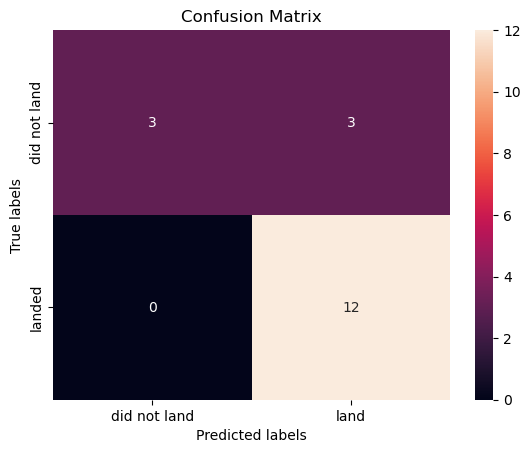

In [50]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### Task 6: Create a Support Vector Machine, then Create a GridSearchCV Object svm_cv with cv = 10 ####

In [53]:
svm = SVC()

# Define hyperparameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),  # Removed duplicate 'rbf'
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit to training data
svm_cv.fit(X_train, Y_train)

# Display best parameters and validation accuracy
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


#### Task 7: Calculate the Accuracy on the Test Data using the Method Score and Plot the Confusion Matrix ####

Test Accuracy: 0.8333333333333334


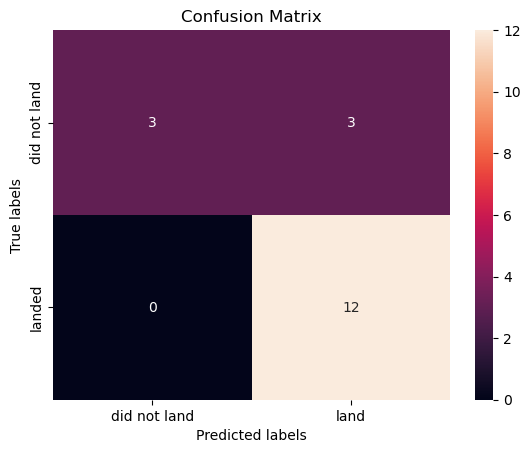

In [56]:
accuracy = svm_cv.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

# Confusion Matrix
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### Task 8: Create a Decision Tree Classifier Object, then Createa GridSearchCV Object tree_cv with cv = 10 ####

In [59]:
tree = DecisionTreeClassifier()

# Define hyperparameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['sqrt'],  # 'auto' is not a valid option for max_features in DecisionTreeClassifier
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
# Create GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit to training data
tree_cv.fit(X_train, Y_train)

# Display best parameters and validation accuracy
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.8857142857142858


#### Task 9: Calculate the Accuracy of tree_cv on the Test data using Method Score and Plot the Confusion Matrix ####

Test Accuracy: 0.7777777777777778


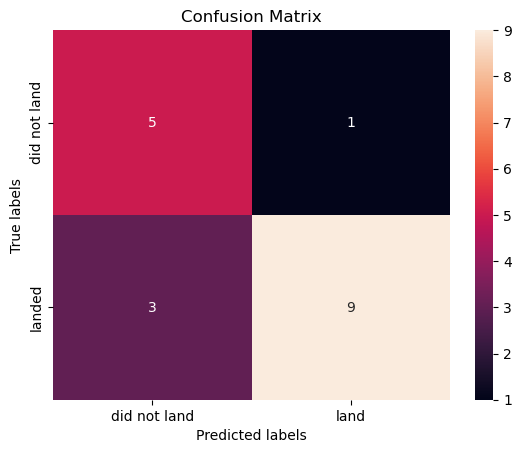

In [65]:
accuracy = tree_cv.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### Task 10: Create a k Nearest Neighbors Object, then Create a GridSearchCV Object knn_cv with cv = 10 ####

In [68]:
KNN = KNeighborsClassifier()

# Define hyperparameter grid
parameters = {
    'n_neighbors': list(range(1, 11)),  # Same as [1, 2, ..., 10]
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit to training data
knn_cv.fit(X_train, Y_train)

# Display best parameters and validation accuracy
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


#### Task 11: Calculate the Accuracy of knn_cv on the Test data using Method Score and Plot the Confusion Matrix ####

Test Accuracy: 0.8333333333333334


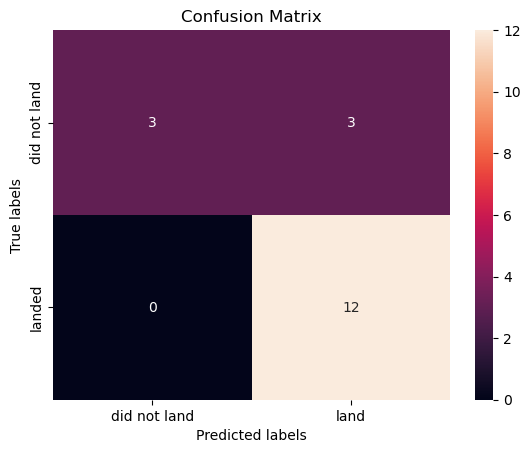

In [72]:
accuracy = knn_cv.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### Task 12: Find that Method that Performs the Best ####

In [75]:
print("Logistic Regression Test Accuracy:", logreg_cv.best_estimator_.score(X_test, Y_test))
print("SVM Test Accuracy:", svm_cv.best_estimator_.score(X_test, Y_test))
print("Decision Tree Test Accuracy:", tree_cv.best_estimator_.score(X_test, Y_test))
print("KNN Test Accuracy:", knn_cv.best_estimator_.score(X_test, Y_test))

Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.7777777777777778
KNN Test Accuracy: 0.8333333333333334


#### Other Methods to Determine the Best Method ####

In [78]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, logreg_cv.best_estimator_.predict(X_test)))
print(classification_report(Y_test, svm_cv.best_estimator_.predict(X_test)))
print(classification_report(Y_test, knn_cv.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

